In [1]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
# convert the csv with our data to a pandas DataFrame
df = pd.read_csv('data.csv')
df = df.dropna() # remove not a number values
df # display the data table

,sec,mm^2
0,390,16.091
1,360,27.557
2,330,20.332
3,300,71.765
4,270,241.475
5,240,359.946
6,210,222.280
7,180,312.323
8,150,329.128
9,120,415.886


In [4]:
# turn the independent (x) and dependent (y) values on the table into numpy arrays 
x = np.array(df['sec']).reshape(-1, 1) # use .reshape(-1, 1) to format it 
y = np.array(df['mm^2']).reshape(-1, 1) # use .reshape(-1, 1) to format it 

In [5]:
reg = LinearRegression().fit(x, y) # fit the linear regression
print("Coefficent of determination: ", reg.score(x, y)) # display the coefficient of determination (R squared)
print("Regression coefficient: ", reg.coef_[0, 0]) # display the slope of the regression line (regression coefficient)
dfc = pd.DataFrame(df.corr(method='pearson')) # convert the correlation coefficients to a dataframe 
print("Correlation coefficient: ", dfc.iat[0, 1]) # display the correlation coefficient (r) between the x and y variables

Coefficent of determination:  0.20229943617254798
Regression coefficient:  -0.7948771046038474
Correlation coefficient:  -0.44977709609599736


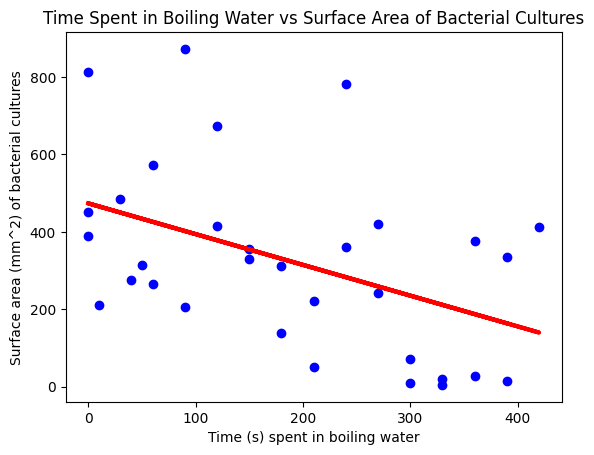

In [6]:
# plot the data points and linear regression results
y_pred = reg.predict(x) # predicted y values according to our model
plt.scatter(x, y, color="blue") # plot the data points as a scatter plot
plt.plot(x, y_pred, color="red", linewidth=3) # plot the line of best fit

plt.title("Time Spent in Boiling Water vs Surface Area of Bacterial Cultures") # display the title
plt.xlabel("Time (s) spent in boiling water") # label the x axis
plt.ylabel("Surface area (mm^2) of bacterial cultures") # label the y axis

plt.show() # display the graph